In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipd

2023-01-27 22:20:34.613688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
## This method is for local development to download from the public storage location.

data_dir = pathlib.Path('./data/mini_speech_commands')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'mini_speech_commands.zip',
      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
      extract=True,
      cache_dir='.', cache_subdir='data')

In [3]:
# Change directory to downloaded data
os.chdir('./data')
default_dir = os.getcwd()
print(f'Data directory will be: {default_dir}')

Data directory will be: /Users/geraldcraig/Repos/ModelTraining/data


In [8]:
def load_audio(file_path):
    audio_binary = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio_binary)
    waveform = tf.squeeze(audio, axis=-1)
    return waveform, sample_rate

def load_audio_files(path: str, label:str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))

    for i, file_path in enumerate(walker):
        path, filename = os.path.split(file_path)
        speaker, _ = os.path.splitext(filename)
        speaker_id, utterance_number = speaker.split("_nohash_")
        utterance_number = int(utterance_number)

        # Load audio
        waveform, sample_rate = load_audio(file_path)
        dataset.append([waveform, sample_rate, label, speaker_id, utterance_number])

    return dataset

In [9]:
labels = [name for name in os.listdir('.') if os.path.isdir(name)]
# back to default directory
os.chdir(default_dir)
print(f'Total Labels: {len(labels)}')
print(f'Label Names: {labels}')

Total Labels: 2
Label Names: ['mini_speech_commands', '__MACOSX']


In [10]:
filenames = tf.io.gfile.glob(str(default_dir) + '/*/*')
num_samples = len(filenames)
print('Number of total examples:', num_samples)

Number of total examples: 11


In [14]:
file_path = "../data/mini_speech_commands/yes/00f0204f_nohash_0.wav"

def load_audio(file_path):
    audio_binary = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio_binary)
    waveform = tf.squeeze(audio, axis=-1)
    return waveform, sample_rate.numpy()

waveform, sample_rate = load_audio(file_path)
print('Waveform Tensor:', waveform)
print('Sample Rate:', sample_rate)

Waveform Tensor: tf.Tensor([0.00042725 0.0007019  0.00057983 ... 0.00057983 0.00067139 0.00073242], shape=(16000,), dtype=float32)
Sample Rate: 16000


In [15]:
def plot_audio(filename):
    waveform, sample_rate = load_audio(filename)

    plt.figure()
    plt.plot(waveform.numpy())

    return waveform, sample_rate

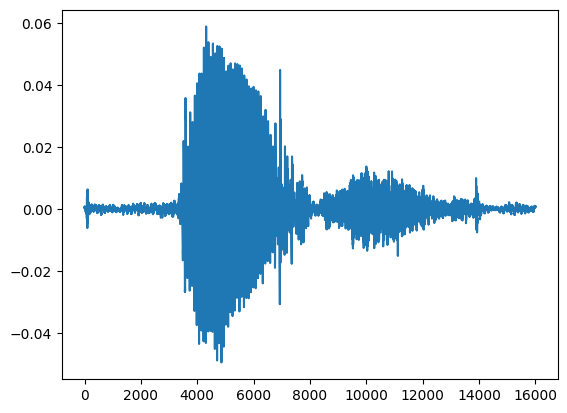

In [17]:
filename = "../data/mini_speech_commands/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

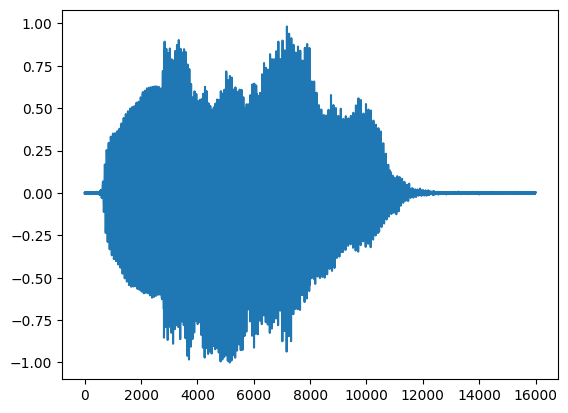

In [18]:
filename = "../data/mini_speech_commands/no/0c2ca723_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

In [19]:
%pip install tensorflow_io

  Using cached tensorflow_io-0.30.0-cp37-cp37m-macosx_10_14_x86_64.whl (24.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
import tensorflow_io as tfio
import IPython.display as ipd
import numpy as np

In [21]:
def load_audio(file_path):
    audio_binary = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio_binary)
    waveform = tf.squeeze(audio, axis=-1)
    return waveform, sample_rate

def load_audio_files(path: str, label:str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))

    for i, file_path in enumerate(walker):
        path, filename = os.path.split(file_path)
        speaker, _ = os.path.splitext(filename)
        speaker_id, utterance_number = speaker.split("_nohash_")
        utterance_number = int(utterance_number)

        # Load audio
        waveform, sample_rate = load_audio(file_path)
        dataset.append([waveform, sample_rate, label, speaker_id, utterance_number])

    return dataset

In [25]:
trainset_speechcommands_yes = load_audio_files('../data/mini_speech_commands/yes', 'yes')
trainset_speechcommands_no = load_audio_files('../data/mini_speech_commands/no', 'no')

print(f'Length of yes dataset: {len(trainset_speechcommands_yes)}')
print(f'Length of no dataset: {len(trainset_speechcommands_no)}')

Length of yes dataset: 1000
Length of no dataset: 1000


In [26]:
yes_waveform = trainset_speechcommands_yes[0][0]
yes_sample_rate = trainset_speechcommands_yes[0][1]
print(f'Yes Waveform: {yes_waveform}')
print(f'Yes Sample Rate: {yes_sample_rate}')
print(f'Yes Label: {trainset_speechcommands_yes[0][2]}')
print(f'Yes ID: {trainset_speechcommands_yes[0][3]}')

no_waveform = trainset_speechcommands_no[0][0]
no_sample_rate = trainset_speechcommands_no[0][1]
print(f'No Waveform: {no_waveform}')
print(f'No Sample Rate: {no_sample_rate}')
print(f'No Label: {trainset_speechcommands_no[0][2]}')
print(f'No ID: {trainset_speechcommands_no[0][3]}')

Yes Waveform: [-0.0027771  -0.00537109 -0.00338745 ... -0.00112915 -0.00131226
 -0.00140381]
Yes Sample Rate: 16000
Yes Label: yes
Yes ID: 004ae714
No Waveform: [0.00720215 0.00610352 0.00552368 ... 0.00979614 0.0085144  0.00921631]
No Sample Rate: 16000
No Label: no
No ID: 012c8314


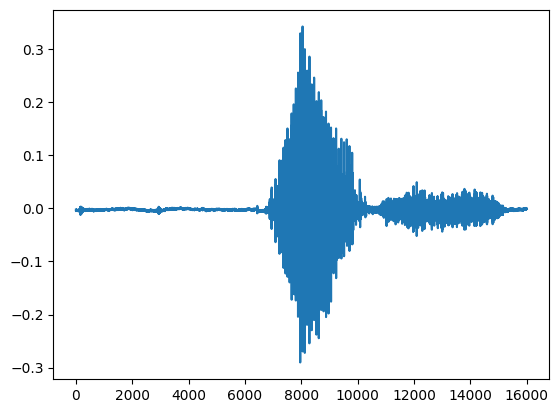

In [27]:
timescale = np.arange(yes_waveform.shape[0])
plt.figsize=(12, 8)
plt.plot(timescale, yes_waveform.numpy())
plt.show()

In [28]:
def get_spectrogram(waveform):

    frame_length = 255
    frame_step = 128
    # Padding for files with less than 16000 samples
    zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)

    # Concatenate audio with padding so that all audio clips will be of the same length
    waveform = tf.cast(waveform, tf.float32)
    equal_length_waveform = tf.concat([waveform, zero_padding], 0)

    # Option 1: Use tfio to get the spectrogram
    spect = tfio.audio.spectrogram(input=equal_length_waveform, nfft=frame_length, window=frame_length, stride=frame_step)

    # Option 2: Use tf.signal processing to get the Short-time Fourier transform (stft)
    spectrogram = tf.signal.stft(equal_length_waveform, frame_length=frame_length, frame_step=frame_step)
    spectrogram = tf.abs(spectrogram)

    return spectrogram, spect

## This funciton has some code from https://www.tensorflow.org/tutorials/audio/simple_audio

In [29]:
spectrogram, spect = get_spectrogram(yes_waveform)

print('Label:', 'yes')
print('Waveform shape:', yes_waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Spect shape:', spect.shape)
print('Audio playback')
ipd.Audio(yes_waveform.numpy(), rate=16000)

Label: yes
Waveform shape: (16000,)
Spectrogram shape: (124, 129)
Spect shape: (125, 128)
Audio playback


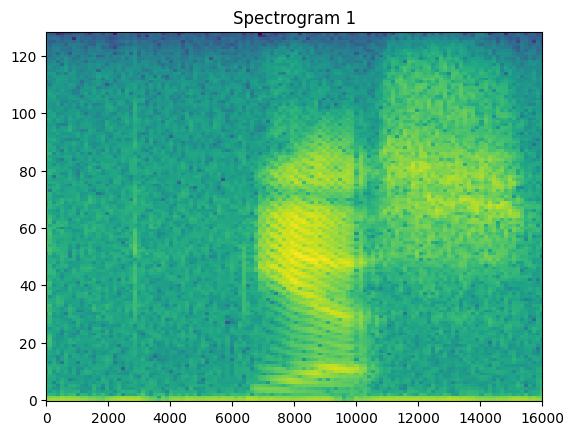

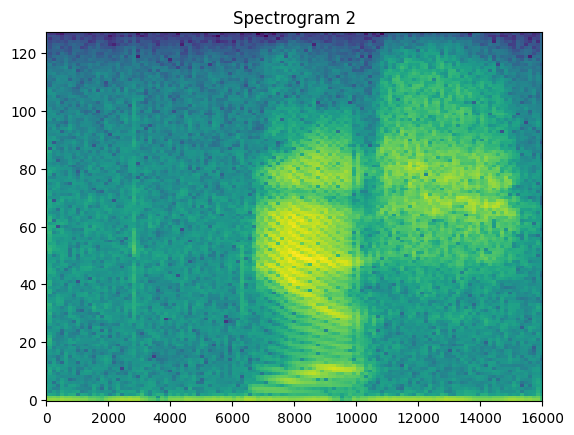

In [30]:
def plot_spectrogram(spectrogram, ax, title):
    # Convert to frequencies to log scale and transpose so that the time is
    # represented in the x-axis (columns).
    log_spec = np.log(spectrogram.T)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)
    ax.set_xlim([0, 16000])
    ax.set_title(title)

fig, ax = plt.subplots()
plot_spectrogram(spectrogram.numpy(), ax, 'Spectrogram 1')
plt.show()

fig, ax = plt.subplots()
plot_spectrogram(spect.numpy(), ax, 'Spectrogram 2')
plt.show()

In [31]:
def create_images(dataset, label_dir):
    # make directory
    test_directory = f'./data/test/{label_dir}/'
    train_directory = f'./data/train/{label_dir}/'

    os.makedirs(test_directory, mode=0o777, exist_ok=True)
    os.makedirs(train_directory, mode=0o777, exist_ok=True)

    for i, data in enumerate(dataset):

        waveform = data[0]
        spectrogram, spect = get_spectrogram(waveform)

        # Split test and train images by 30%
        if i % 3 == 0:
            plt.imsave(f'./data/test/{label_dir}/spec_img{i}.png', spectrogram.numpy(), cmap='gray')
        else:
            plt.imsave(f'./data/train/{label_dir}/spec_img{i}.png', spectrogram.numpy(), cmap='gray')

In [32]:
create_images(trainset_speechcommands_yes, 'yes')
create_images(trainset_speechcommands_no, 'no')

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import tensorflow_io as tfio
import IPython.display as ipd

In [34]:
train_directory = './data/train/'
test_directory = './data/test/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory, labels='inferred', label_mode='int', image_size=(256, 256), seed=123,
    validation_split=0.2, subset='validation')

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory, labels='inferred', label_mode='int', image_size=(256, 256),
    validation_split=None, subset=None)

class_names = train_ds.class_names
print(class_names)

Found 1332 files belonging to 2 classes.
Using 266 files for validation.
Found 668 files belonging to 2 classes.
['no', 'yes']


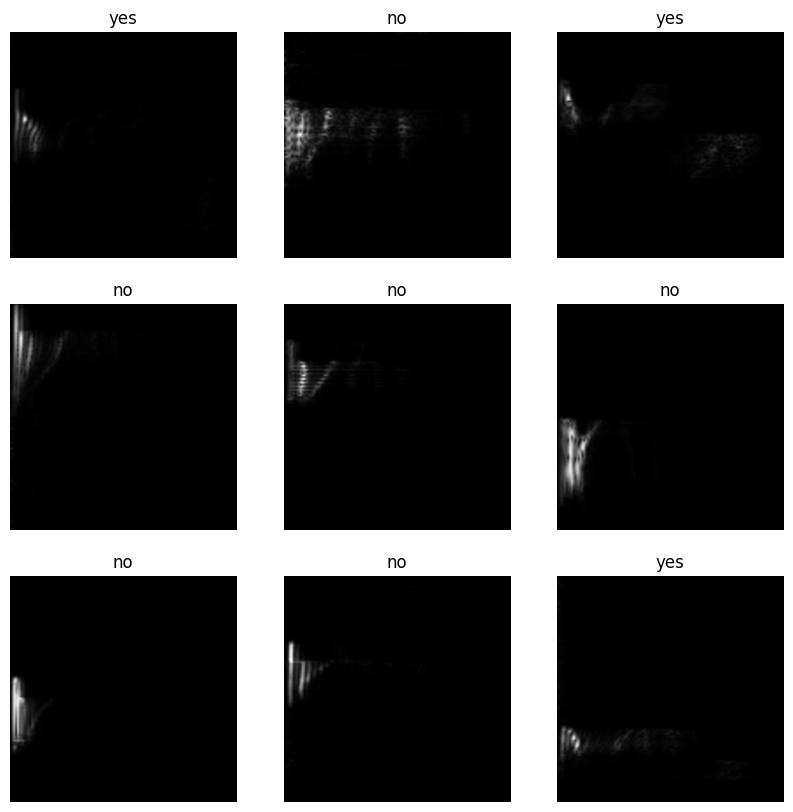

In [35]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [36]:
num_classes = 2
img_height = 256
img_width = 256

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [37]:
learning_rate = 0.125

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)

In [38]:
# Set the epocks
epochs = 15
print('\nFitting:')

# Train the model.
history = model.fit(train_ds, epochs=epochs)


Fitting:
Epoch 1/15
9/9 [==============================] - 13s 1s/step - loss: 0.6446 - accuracy: 0.6128
Epoch 2/15
9/9 [==============================] - 10s 1s/step - loss: 0.6127 - accuracy: 0.6617
Epoch 3/15
9/9 [==============================] - 9s 981ms/step - loss: 0.8238 - accuracy: 0.4662
Epoch 4/15
9/9 [==============================] - 10s 1s/step - loss: 0.6879 - accuracy: 0.5827
Epoch 5/15
9/9 [==============================] - 9s 920ms/step - loss: 0.6610 - accuracy: 0.5827
Epoch 6/15
9/9 [==============================] - 9s 973ms/step - loss: 0.6225 - accuracy: 0.6316
Epoch 7/15
9/9 [==============================] - 9s 993ms/step - loss: 0.5662 - accuracy: 0.6805
Epoch 8/15
9/9 [==============================] - 9s 979ms/step - loss: 0.5948 - accuracy: 0.6767
Epoch 9/15
9/9 [==============================] - 9s 967ms/step - loss: 0.6553 - accuracy: 0.6541
Epoch 10/15
9/9 [==============================] - 9s 1s/step - loss: 0.4811 - accuracy: 0.7632
Epoch 11/15
9/9 [=

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [40]:
correct = 0
batch_size = 0
for batch_num, (X, Y) in enumerate(test_ds):
    batch_size = len(Y)
    pred = model.predict(X)
    for i in range(batch_size):
        predicted = np.argmax(pred[i], axis=-1)
        actual = Y[i]
        #print(f'predicted {predicted}, actual {actual}')
        if predicted == actual:
            correct += 1
    break

print(f'Number correct: {correct} out of {batch_size}')
print(f'Accuracy {correct / batch_size}')

1/1 [==============================] - 2s 2s/step
Number correct: 30 out of 32
Accuracy 0.9375


In [45]:
def load_audio(file_path):
    sample_rate = 16000
    channels = 1
    audio_binary = tf.io.read_file(file_path)
    audio, original_sample_rate = tf.audio.decode_wav(audio_binary) # desired_samples=sample_rate,desired_channels=channels
    audio = tfio.audio.resample(audio, original_sample_rate.numpy(), sample_rate)
    waveform = tf.squeeze(audio, axis=-1)
    return waveform, sample_rate

In [46]:
no_waveform, no_sample_rate = load_audio('../data/no.wav')
yes_waveform, yes_sample_rate = load_audio('../data/yes.wav')

print(no_waveform.shape)
print(yes_waveform.shape)

InvalidArgumentError: {{function_node __wrapped__Squeeze_device_/job:localhost/replica:0/task:0/device:CPU:0}} Can not squeeze dim[1], expected a dimension of 1, got 2 [Op:Squeeze]